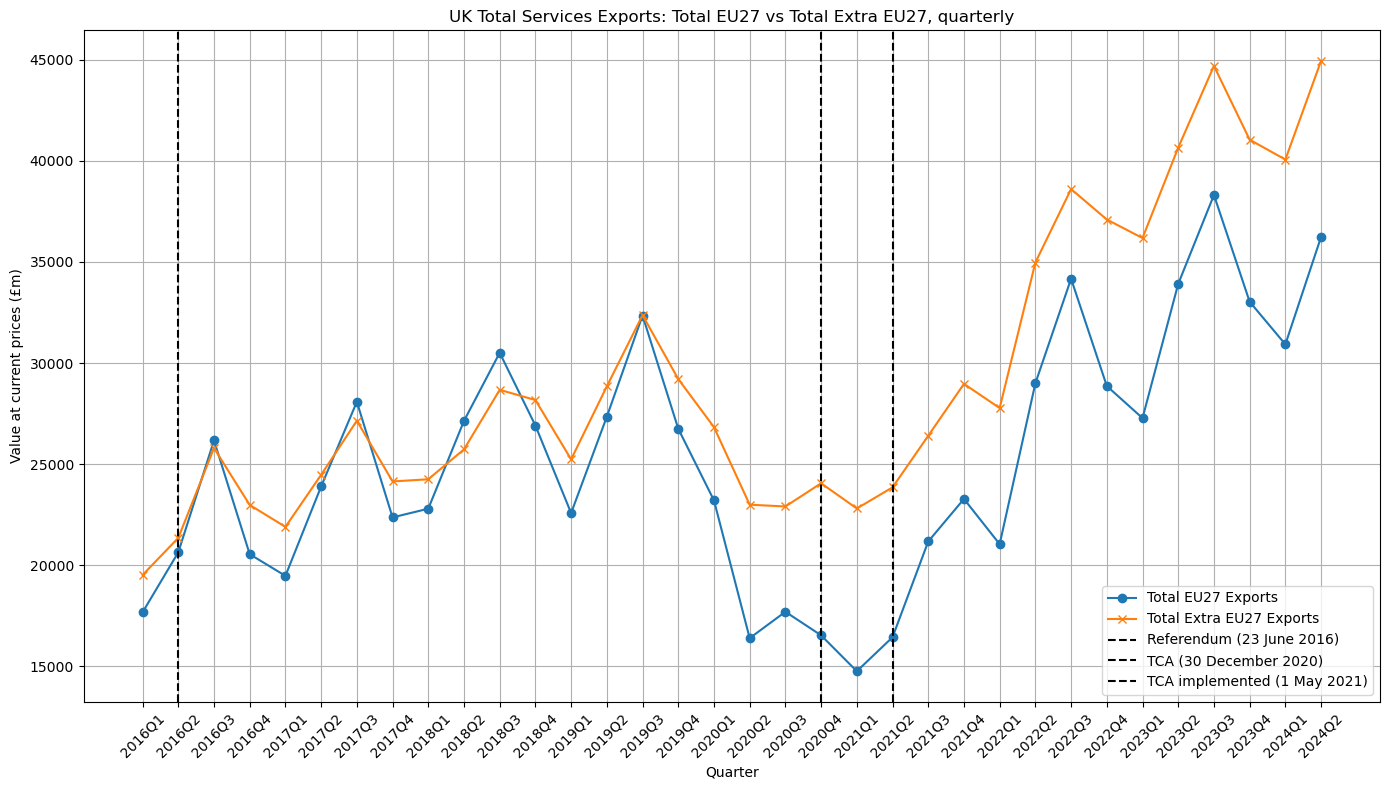

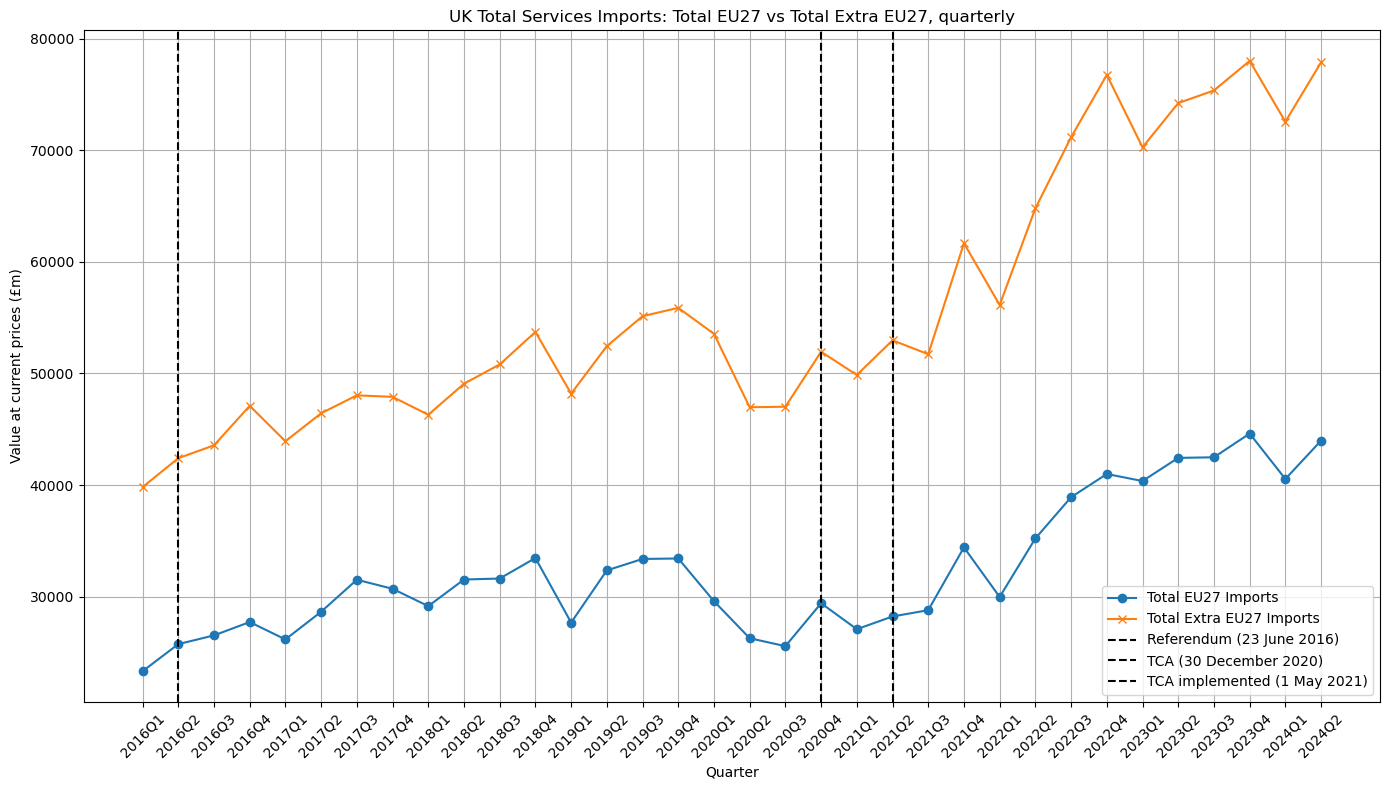

In [16]:
# Re-import necessary libraries since the session was reset
import pandas as pd
import matplotlib.pyplot as plt

# Reload the quarterly data file and relevant sheet
file_path = r'c:\A1 Dissertation\Data\primary dataset.xlsx'
sheet_name = '6 TiS by Country - Q'
data_quarterly = pd.read_excel(file_path, sheet_name=sheet_name)

# Re-identify rows containing 'Total EU27' and 'Total Extra EU27 (Rest of World)'
eu27_data_q = data_quarterly[data_quarterly.apply(lambda row: row.astype(str).str.contains('Total EU27', case=False).any(), axis=1)]
extra_eu27_data_q = data_quarterly[data_quarterly.apply(lambda row: row.astype(str).str.contains('Total Extra EU27', case=False).any(), axis=1)]
# Ensure all quarters, including the final entries, are captured
quarters = data_quarterly.iloc[2, 1:].dropna().reset_index(drop=True)
quarters = quarters[quarters.str.contains('Q', na=False)]  # Filter for valid quarters

# Re-extract export and import data to include all entries
eu27_exports_q = pd.to_numeric(eu27_data_q.iloc[1, 2:len(quarters)+2], errors='coerce')
extra_eu27_exports_q = pd.to_numeric(extra_eu27_data_q.iloc[1, 2:len(quarters)+2], errors='coerce')
eu27_imports_q = pd.to_numeric(eu27_data_q.iloc[0, 2:len(quarters)+2], errors='coerce')
extra_eu27_imports_q = pd.to_numeric(extra_eu27_data_q.iloc[0, 2:len(quarters)+2], errors='coerce')

# Replotting both graphs with the full data range
# Plot 1: Total EU27 Exports vs Total Extra EU27 Exports
plt.figure(figsize=(14, 8))
plt.plot(quarters, eu27_exports_q, label='Total EU27 Exports', marker='o')
plt.plot(quarters, extra_eu27_exports_q, label='Total Extra EU27 Exports', marker='x')

# Add vertical dotted lines with labels
plt.axvline(x='2016Q2', color='black', linestyle='--', label='Referendum (23 June 2016)')
plt.axvline(x='2020Q4', color='black', linestyle='--', label='TCA (30 December 2020)')
plt.axvline(x='2021Q2', color='black', linestyle='--', label='TCA implemented (1 May 2021)')

# Add labels and title
plt.xlabel('Quarter')
plt.ylabel('Value at current prices (£m)')
plt.title('UK Total Services Exports: Total EU27 vs Total Extra EU27, quarterly')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot 2: Total EU27 Imports vs Total Extra EU27 Imports
plt.figure(figsize=(14, 8))
plt.plot(quarters, eu27_imports_q, label='Total EU27 Imports', marker='o')
plt.plot(quarters, extra_eu27_imports_q, label='Total Extra EU27 Imports', marker='x')

# Add vertical dotted lines with labels
plt.axvline(x='2016Q2', color='black', linestyle='--', label='Referendum (23 June 2016)')
plt.axvline(x='2020Q4', color='black', linestyle='--', label='TCA (30 December 2020)')
plt.axvline(x='2021Q2', color='black', linestyle='--', label='TCA implemented (1 May 2021)')

# Add labels and title
plt.xlabel('Quarter')
plt.ylabel('Value at current prices (£m)')
plt.title('UK Total Services Imports: Total EU27 vs Total Extra EU27, quarterly')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
